In [1]:
import pandas as pd
stroke= pd.read_csv('stroke_data.csv')

In [2]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
stroke.drop(['id'],axis=1,inplace=True)

In [4]:
stroke.dropna(inplace=True)

In [5]:
stroke['stroke'].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

In [6]:
stroke.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Data Analysis

In [7]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


Target variable with value 0 : 4700
Target variable with value 1 : 209


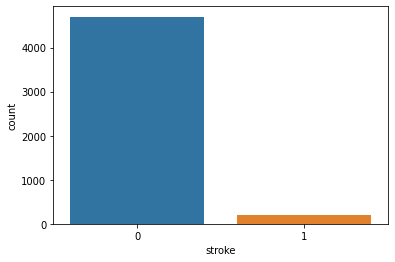

In [19]:
import seaborn as sns
sns.countplot(x = 'stroke',data = stroke)
print("Target variable with value 0 : "+ format(len(stroke.loc[stroke['stroke']==0])))
print("Target variable with value 1 : "+ format(len(stroke.loc[stroke['stroke']==1])))

In [12]:
stroke['gender'] = stroke['gender'].astype('category').cat.codes
stroke['ever_married'] = stroke['ever_married'].astype('category').cat.codes
stroke['work_type'] = stroke['work_type'].astype('category').cat.codes
stroke['Residence_type'] = stroke['Residence_type'].astype('category').cat.codes
stroke['smoking_status'] = stroke['smoking_status'].astype('category').cat.codes

# Model Creation

In [13]:
X = stroke.loc[:, stroke.columns != 'stroke']
Y = stroke['stroke'].values

In [14]:
from imblearn.over_sampling import RandomOverSampler
oversample=RandomOverSampler(sampling_strategy='minority')
X, Y = oversample.fit_resample(X, Y)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.35,random_state=0)

In [35]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.9899696048632218

In [26]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0.5,0.816895,0.0,1.0,1.0,0.50,1.0,0.801265,0.301260,0.333333
1,0.5,0.975586,0.0,1.0,1.0,0.50,0.0,0.234512,0.254296,0.666667
2,0.0,0.597168,0.0,0.0,1.0,0.50,1.0,0.536008,0.276060,1.000000
3,0.0,0.963379,1.0,0.0,1.0,0.75,0.0,0.549349,0.156930,0.666667
4,0.5,0.987793,0.0,0.0,1.0,0.50,1.0,0.605161,0.214204,0.333333
...,...,...,...,...,...,...,...,...,...,...
9395,0.0,0.975586,1.0,0.0,1.0,0.75,0.0,0.081017,0.213058,0.666667
9396,0.0,0.743652,0.0,1.0,1.0,0.00,0.0,0.301634,0.303551,1.000000
9397,0.5,0.975586,0.0,1.0,1.0,0.75,1.0,0.912196,0.231386,0.333333
9398,0.0,0.890137,1.0,0.0,1.0,0.50,0.0,0.623303,0.300115,0.666667


# Model File

In [27]:
import joblib 
joblib.dump(model, 'model.pkl',compress=1)

['model.pkl']

In [29]:
#Sample prediction for Random Input
import numpy as np
load_model = joblib.load('model.pkl')
values = np.transpose(np.array([[0], [0.743652], [0], [1], [1], [0], [0], [0.301634], [0.303551],[1]]))
values.reshape(1, -1)
predictions = load_model.predict(values)

In [30]:
predictions

array([1])